In [2]:
import numpy as np

In [11]:
def generate_random_topography(nx, ny):
    return np.rint(np.random.rand(nx,ny))

def generate_slopy_topography(nx, ny, zmin, zmax):
    d = np.zeros((nx,ny))
    for y in range(ny):
        d[:][y] = zmin + (zmax-zmin)*(y/ny)
    return d

def generate_valley_on_axis(nx, ny, zmax, zmin, axis=0):
    X = [0, int(nx/2), nx]
    Y = [zmax, zmin, zmax]
    d = np.zeros((nx,ny))
    for y in range(ny):
        for x in range(nx):
            if axis == 0:
                d[x][y] = np.interp(x, X, Y)
            else:
                d[x][y] = np.interp(y, X, Y)
    return d

In [12]:
topo = generate_slopy_topography(300, 300, 400, 500)
np.savetxt('topography.csv', topo, delimiter=",")

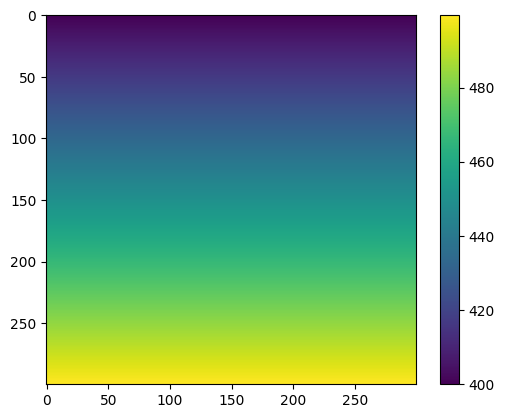

In [13]:
import matplotlib.pyplot as plt

f = plt.figure()
plt.imshow(topo)
plt.colorbar()

In [1]:
import numpy as np


In [ ]:
def perlin_noise(n_octaves, x, dx):
    rng = np.random.default_rng(1)
    
    curves = []
    x_size = len(x)
    max_value = 100
    # for i in range(n_octaves):
    random_size = np.floor(x_size/10) + 1
    random_data = rng.random((random_size)) * max_value
    distance = [x*dx for x in range(random_size)]
    perlin_curve = [np.interp(x, distance, random_data) for x in range(x_size)]
    max_value /= 2 
    return None

In [102]:
### user
x0 = 0
nx = 300
dx = 10

### internal
rng = np.random.default_rng(2)   
max_value = 100
divisor_factor = 40
perlin_curves = []

### loop
for i in range(10):
    size = int(np.floor(nx/divisor_factor) + 1)
    random_data = rng.random((size)) * max_value
    x_axis = np.linspace(x0, x0 + nx*dx, num=size)
    perlin_curve = [np.interp(x, x_axis, random_data) for x in range(nx)]
    perlin_curves.append(perlin_curve)

    divisor_factor /= 2
    max_value /= 2
    
perlin_curve = np.sum(perlin_curves, axis=0)

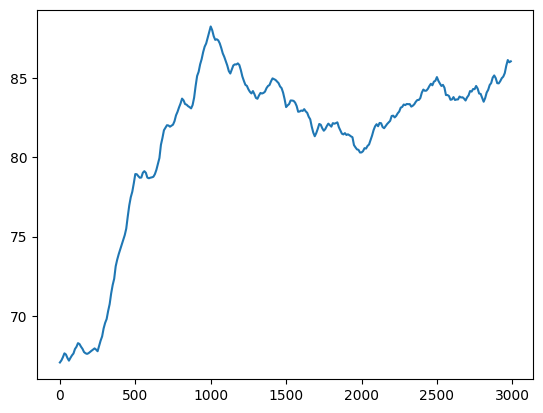

In [103]:
import matplotlib.pyplot as plt
x = [x0 + x * dx for x in range(nx)]
plt.plot(x, perlin_curve)

In [ ]:
### GENERATORS
# axis surface, z, x, y
# perlin   noise
# worley   noise
# simplex  noise
# cellular noise